# Random Forest - Binary Classification

# 0. Setup

In this notebook, we'll explore Decision Trees and Random Forests for classification using the Palmer Penguins dataset.

## The Data

We are going to use the 'Palmer Penguins' dataset because penguins are funny creatures. More info can be found at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

<img src="images/penguin.jpg" style="max-width:400px">


Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Exploration

Let's start by loading our dataset and exploring its characteristics.

In [26]:
df = pd.read_csv("datasets/penguins_size.csv")

In [27]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


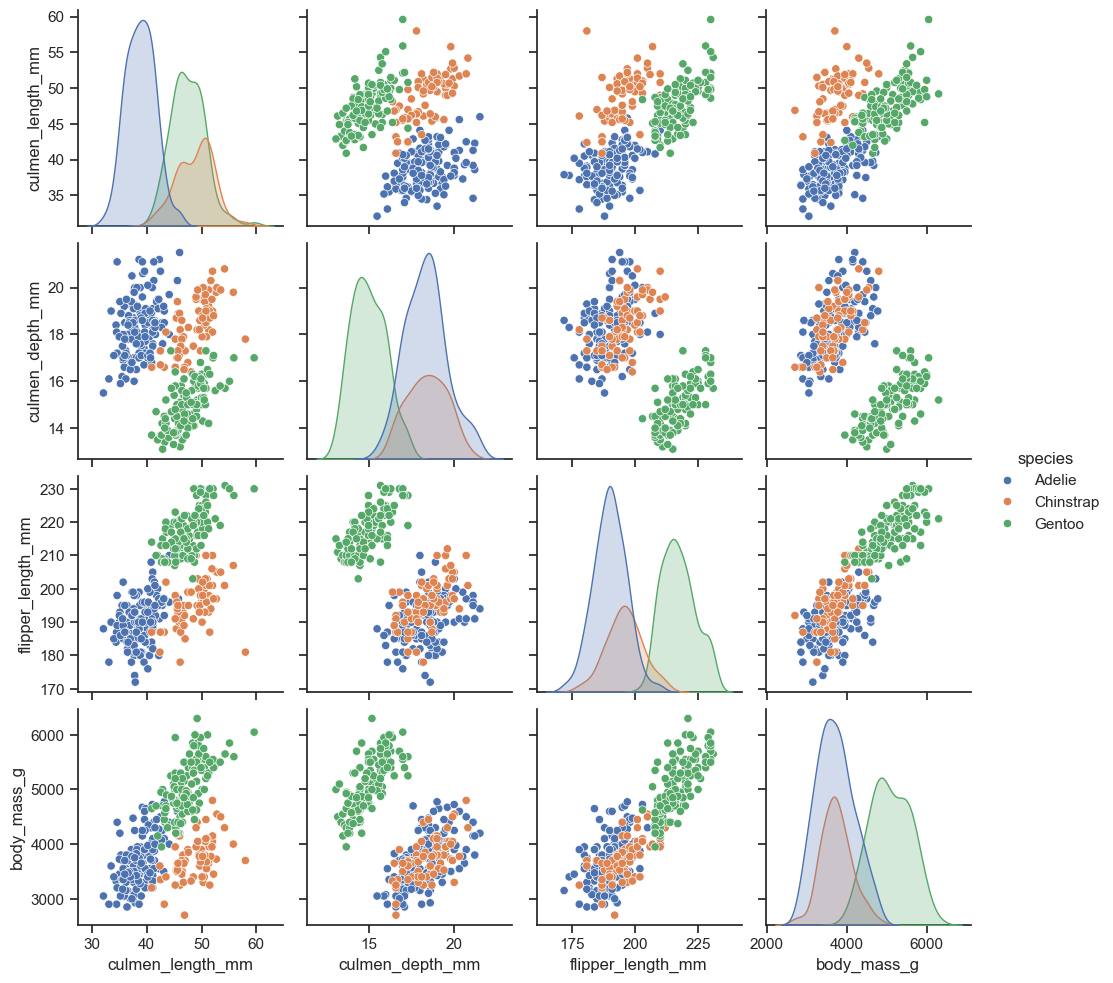

In [28]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="species")

In [ ]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

# 2. Data Preprocessing

Now that we've explored our data, let's prepare it for model training.

In [30]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [31]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


## Train | Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 3. Model Building

Let's build and train our Decision Tree model.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
preds = Dtree.predict(X_test)

# 4. Evaluation

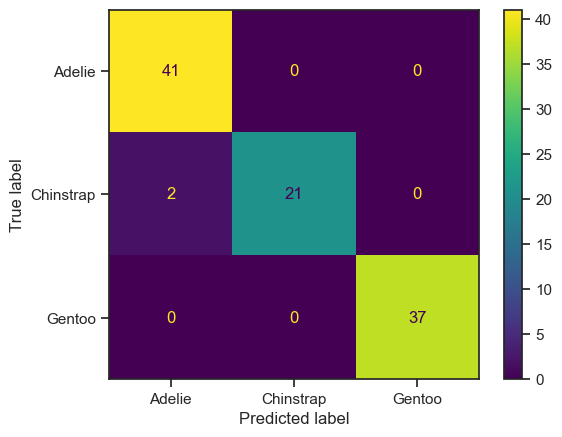

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test,preds)
CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=Dtree.classes_)
CM_plot.plot()

In [38]:
X_test.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_FEMALE',
       'sex_MALE'],
      dtype='object')

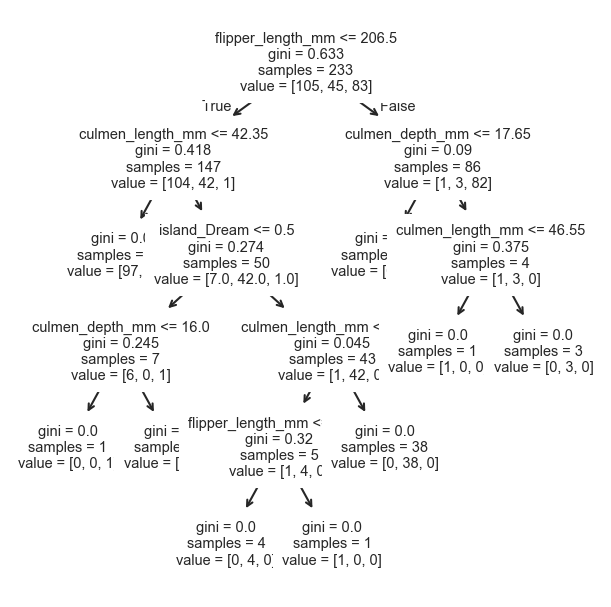

In [39]:
from sklearn import tree
plt.figure(figsize = (5,5), dpi = 150)
tree.plot_tree(Dtree, fontsize = 7, 
               feature_names = ['culmen_length_mm', 'culmen_depth_mm', 
                                'flipper_length_mm','body_mass_g', 
                                'island_Dream', 'island_Torgersen', 
                                'sex_FEMALE','sex_MALE']);